# **Predict Student Scores**

In this project I was required to implement a simple linear regression model to
predict student scores based on the number of
hours they study.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [2]:
# load dataset
df = pd.read_csv('student_scores.csv')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
# view the dataset
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Exploration

In [5]:
# check the shape
df.shape

(25, 2)

In [6]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
# check the descriptive summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


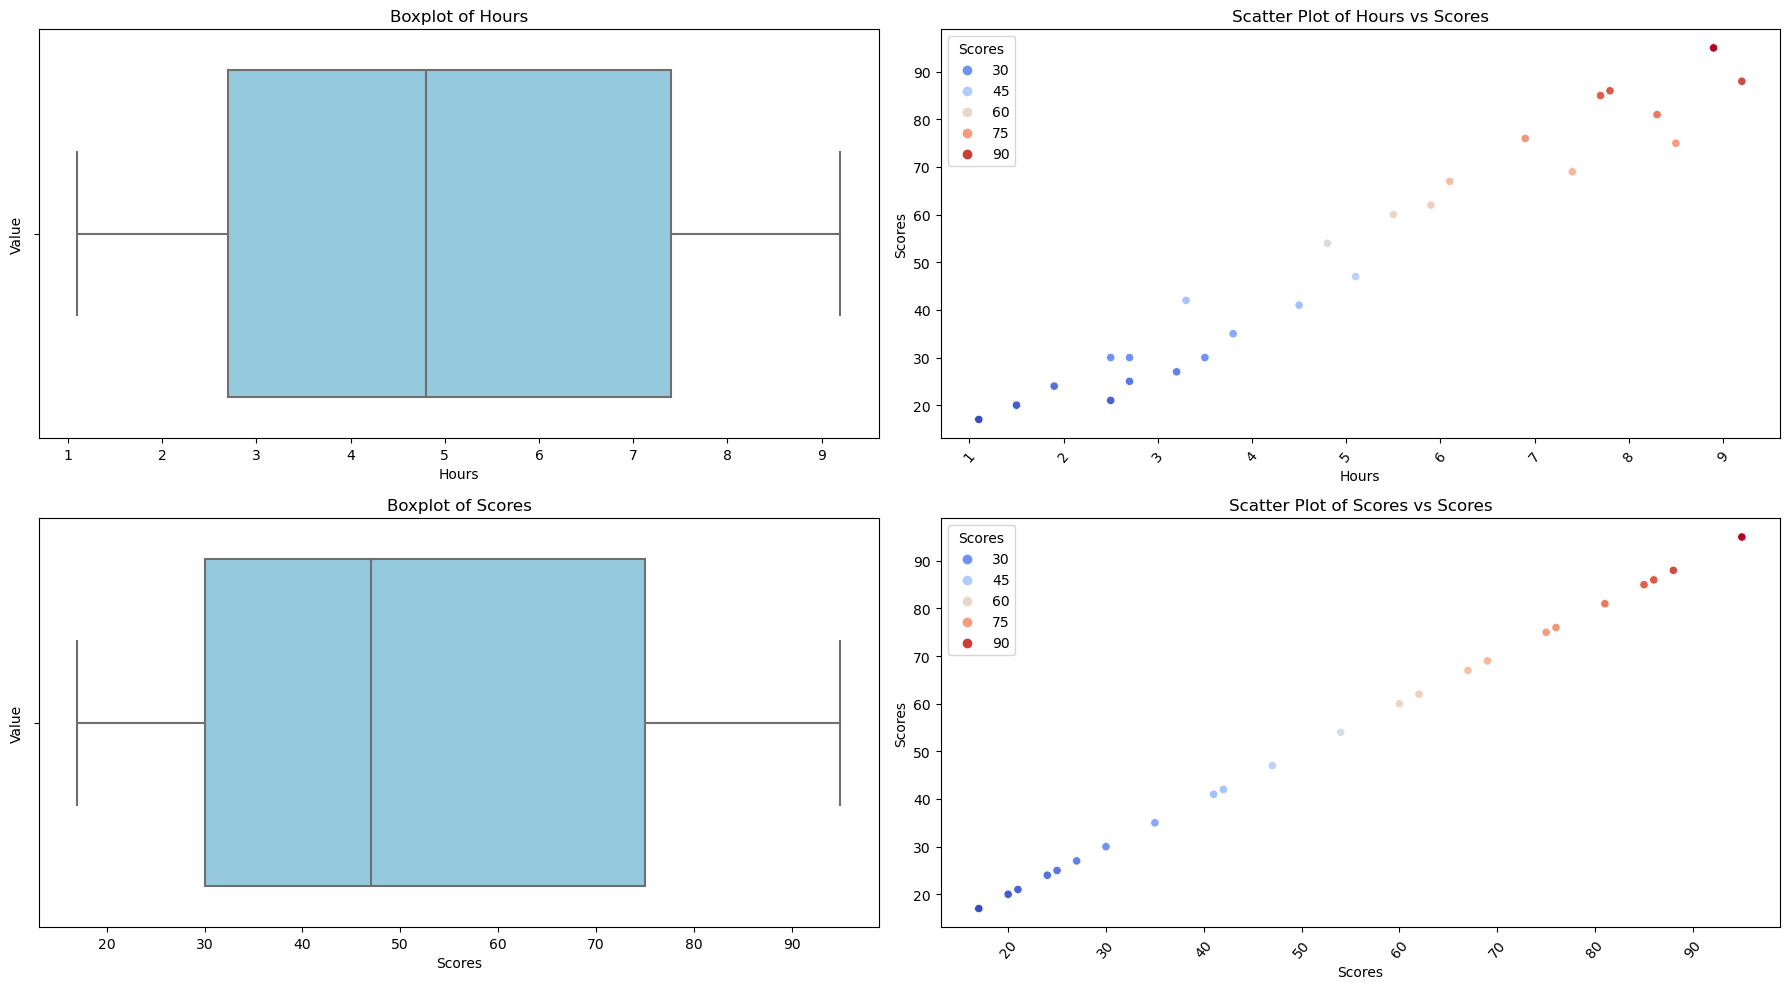

In [8]:
# plot of boxplot and scatterplot of the data

num_col = df.columns

col_len = len(num_col)
rows = col_len
fig, axes = plt.subplots(rows, 2, figsize=(18, 5 * rows))

for i, column in enumerate(num_col):
    sns.boxplot(data=df,x=column,color='skyblue',ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot of {column}")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Value")

    sns.scatterplot(data=df,x=column,y='Scores',hue='Scores',palette="coolwarm",ax=axes[i, 1])
    axes[i, 1].set_title(f"Scatter Plot of {column} vs Scores")
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel("Scores")
    axes[i, 1].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


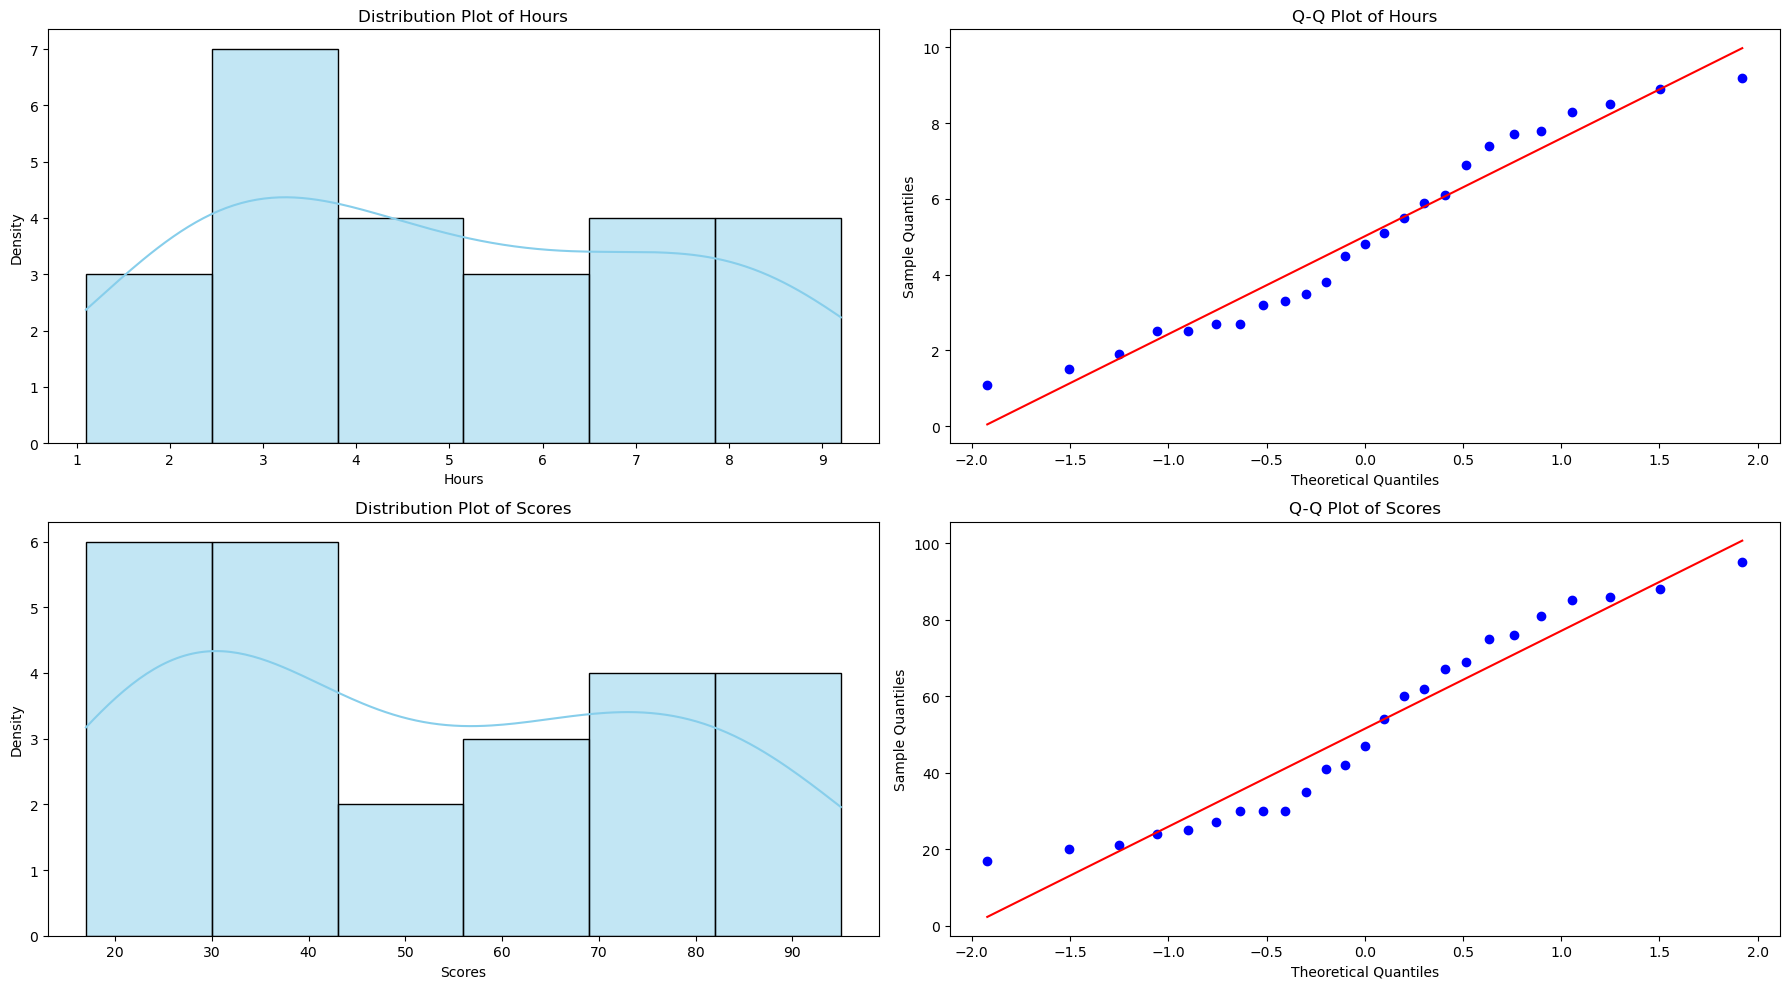

In [9]:
# histplot and density plots

col_len = len(num_col)
rows = col_len
fig, axes = plt.subplots(rows, 2, figsize=(18, 5 * rows))

for i, column in enumerate(num_col):
    sns.histplot(df[column], kde=True, color="skyblue", ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution Plot of {column}")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Density")

    stats.probplot(df[column],dist="norm",plot=axes[i, 1])
    axes[i, 1].get_lines()[1].set_color('red')
    axes[i, 1].set_title(f"Q-Q Plot of {column}")
    axes[i, 1].set_xlabel("Theoretical Quantiles")
    axes[i, 1].set_ylabel("Sample Quantiles")

plt.tight_layout()
plt.show()

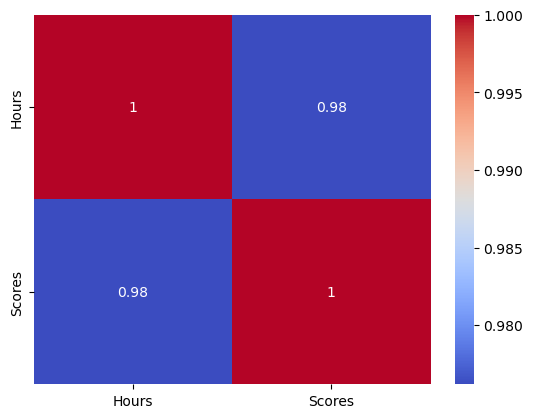

In [10]:
# correlation between hours spent and student scores and visualize it
df.corr()

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

# Data Cleaning

In [11]:
# check for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
# check for duplicates
df.duplicated().sum()

0

Our data is clean therefore, we need to proceed with the analysis.

# Model Building

In [13]:
# simple linear regression model to predict student scores
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# now split the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
# making predictions using the model
y_pred = model.predict(X_test)

In [15]:
# finding the accuracy of the model using various metrics

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test,y_test)

print("Mean Squared Error:",mse)
print('-'*45)
print("Root Mean Squared Error:",rmse)
print('-'*45)
print("Mean Absolute Error:", mae)
print('-'*45)
print("R-Squared:",r2)

Mean Squared Error: 18.943211722315272
---------------------------------------------
Root Mean Squared Error: 4.352380006653288
---------------------------------------------
Mean Absolute Error: 3.9207511902099244
---------------------------------------------
R-Squared: 0.9678055545167994


An R² of 0.968 indicates that the model explains 96.8% of the variability in the students' scores based on the number of hours studied. This is a very high value, suggesting that the model fits the data well.